# Predictive Power of Imbalance

## 1. Prediction Power of Imbalance on Futur Price Movements

In this notebook, we will study the relationship between Imblance and Price Movements which corresponds to the classical law of supply and demand.

The imbalance is defined by : 
$$Imb = \frac{Q_{ask}-Q_{bid}}{Q_{ask}+Q_{bid}}$$
where $Q_{bid}$ and $Q{ask}$ are volume of the bid/ask of the order book.

We compute for different horizons $h$ (between 1 and 10) the difference between between the current price and the futur price at horizon h in basis points (bps), which is : 

$$diff(h)=100\times100\times\frac{P_{t+h}-P_t}{P_t}$$
We would like to deduce the predictive power of $diff(h)$ with respect of the h values. We then study the relationship for different h. 

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data_folder = "StockData/"
files = os.listdir(data_folder)
DATAS = {}
for f in files:
    df = pd.read_hdf(data_folder+f)
    DATAS[f.replace(".h5","").lower()] = pd.read_hdf(data_folder+f)
market = [market for market in DATAS]

We chose the order book of Total but we could choose any other orderbook of an asset. We also work on the year $2011$:

In [3]:
df_asset = DATAS["total"]
df_asset[df_asset.index.year == 2011]
df_asset.head()

,TradedPrice,TradedQty,BidPrice,AskPrice,BidQty,AskQty,TradedSign
Time,,,,,,,
2011-01-03 09:00:01.988,40.19,70,40.01,40.19,660800,40700,1
2011-01-03 09:00:01.988,40.19,15,40.01,40.19,660800,40700,1
2011-01-03 09:00:01.988,40.19,67,40.01,40.19,660800,40700,1
2011-01-03 09:00:01.988,40.19,20,40.01,40.19,660800,40700,1
2011-01-03 09:00:01.988,40.19,250,40.01,40.19,660800,40700,1


In [5]:
df_asset['Imbalance'] = ((df_asset.AskQty - df_asset.BidQty)/(df_asset.AskQty + df_asset.BidQty)).round(decimals = 1)
df_asset['Imbalance_Cat'] = pd.cut(df_asset.Imbalance, np.linspace(-1.0,1.0,21),right=False)
for h in range(1,11):
    df_asset['diff_'+str(h)] = - 100* 100 * df_asset.TradedPrice.diff(periods=h) / df_asset.TradedPrice
df_asset.head()

,TradedPrice,TradedQty,BidPrice,AskPrice,BidQty,AskQty,TradedSign,Imbalance,Imbalance_Cat,diff_1,diff_2,diff_3,diff_4,diff_5,diff_6,diff_7,diff_8,diff_9,diff_10
Time,,,,,,,,,,,,,,,,,,,
2011-01-03 09:00:01.988,40.19,70,40.01,40.19,660800,40700,1,-0.9,"[-0.9, -0.8)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03 09:00:01.988,40.19,15,40.01,40.19,660800,40700,1,-0.9,"[-0.9, -0.8)",-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03 09:00:01.988,40.19,67,40.01,40.19,660800,40700,1,-0.9,"[-0.9, -0.8)",-0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03 09:00:01.988,40.19,20,40.01,40.19,660800,40700,1,-0.9,"[-0.9, -0.8)",-0.0,-0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03 09:00:01.988,40.19,250,40.01,40.19,660800,40700,1,-0.9,"[-0.9, -0.8)",-0.0,-0.0,-0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN


/var/folders/ly/ylvnx_l518x5nbt0ssvchqww0000gn/T/ipykernel_58555/229921975.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Y.append(df_asset.groupby(['Imbalance_Cat'])['diff_'+str(h)].mean())


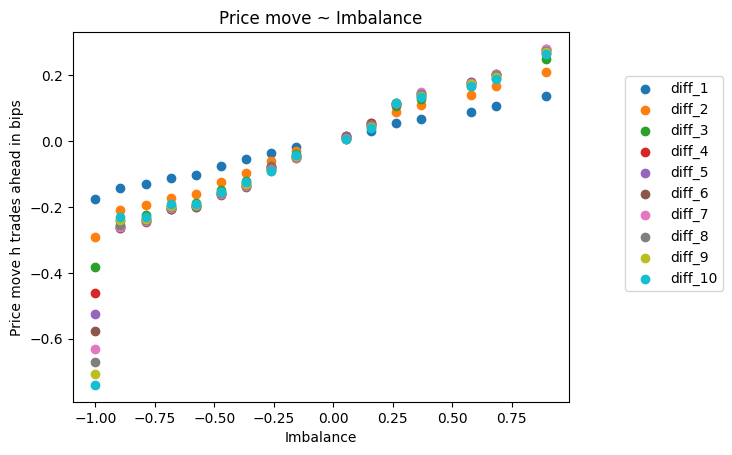

In [7]:
Y = []
for h in range(1,11):
    Y.append(df_asset.groupby(['Imbalance_Cat'])['diff_'+str(h)].mean())
    plt.scatter(np.linspace(-1,1,20),Y[h-1], label = "diff_"+str(h))
plt.xlabel("Imbalance")
plt.ylabel("Price move h trades ahead in bips")
plt.legend(bbox_to_anchor=(1.1, 0.9))
plt.title("Price move ~ Imbalance")
plt.rcParams["figure.figsize"] = (10,8)

<font color='blue'>
The imbalance can perfectly predict the sing of the next transaction. The amplitude of the variation of the price is monotone in the imbalance.
</font>

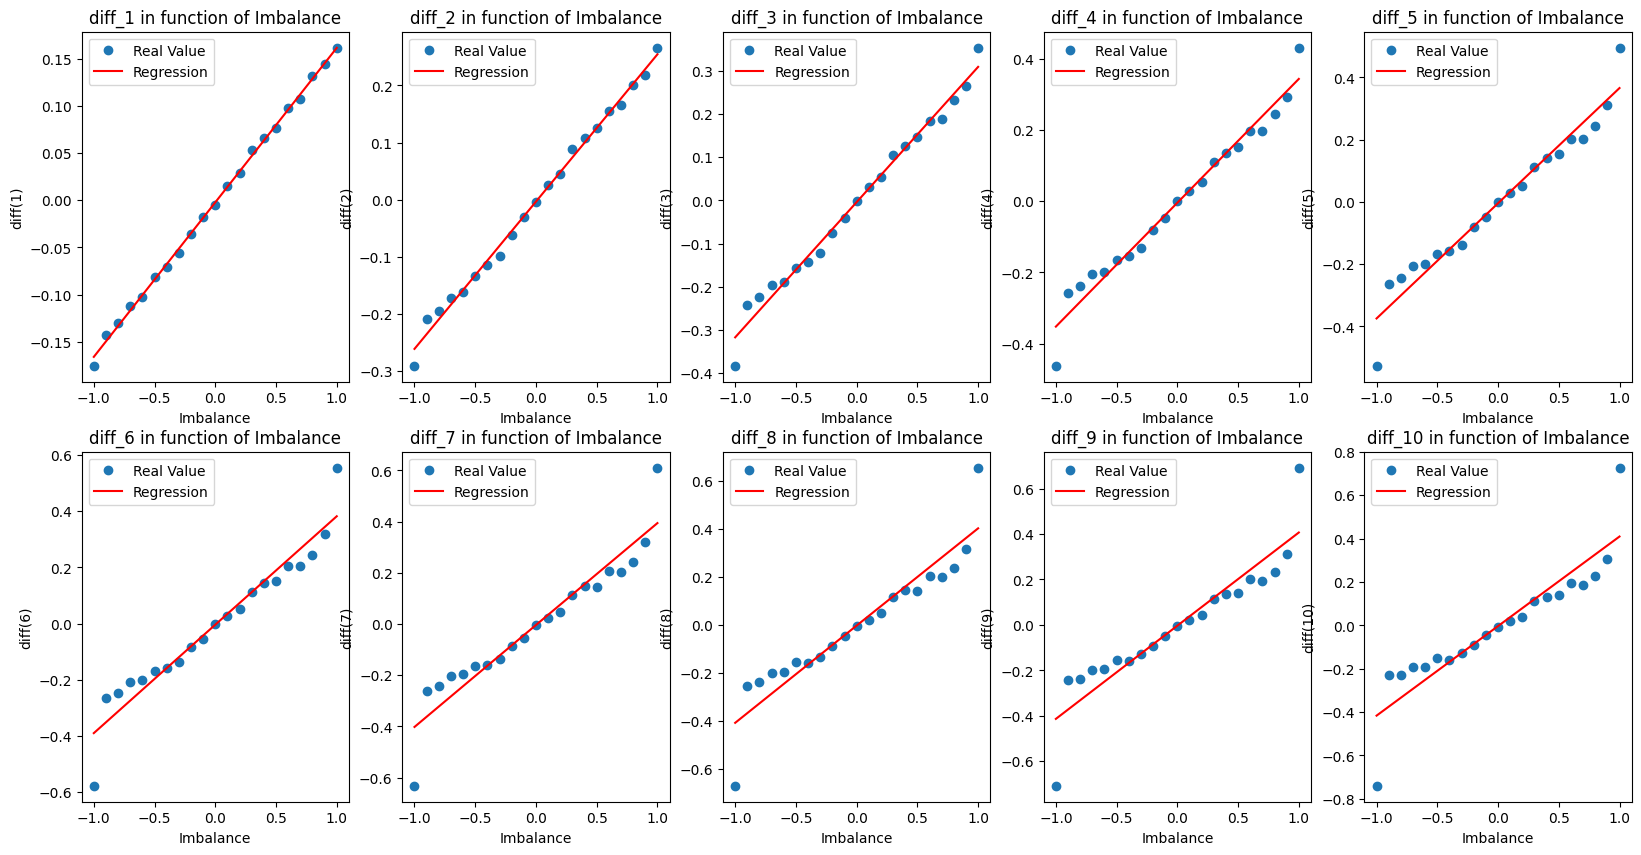

,h,score_r2
0,diff(1),0.998432
1,diff(2),0.994082
2,diff(3),0.984258
3,diff(4),0.967109
4,diff(5),0.946247
5,diff(6),0.923729
6,diff(7),0.895241
7,diff(8),0.870772
8,diff(9),0.845740
9,diff(10),0.820430


In [8]:
scores = {}


fig, axes = plt.subplots(2, 5, figsize=(20, 10))


for h in range(10):
    df_asset_group = df_asset.groupby('Imbalance')[f'diff_{h+1}'].mean()
    df_asset_group.plot(ax= axes[h//5][h%5], ylabel=f'diff({h+1})', label='Real Value', marker='o', linestyle='None')
    x = df_asset_group.index.to_numpy()
    y = df_asset_group.to_numpy()
    x = x.reshape(-1, 1)
    linear_regression = LinearRegression(fit_intercept=True).fit(x, y)
    y_predict = linear_regression.predict(x)
    axes[h//5][h%5].plot(x, y_predict, color='red', label='Regression')
    axes[h//5][h%5].legend()
    axes[h//5][h%5].set_title(f'diff_{h+1} in function of Imbalance')
    scores[f'diff({h+1})'] = linear_regression.score(x,y)

plt.show()

df_scores = pd.DataFrame(list(scores.items()), columns=['h', 'score_r2'])


df_scores

- We observe a strong linear relationship between Imbalance and futur price movement. However the more h increase the less the imbalance is lenearly dependant to the price movement.

- Moreover, we observe that if $Ask$(sellers) is big in comparison to $Bid$(buyers) then the price decreaser. Inversely, if the $Bid$ size increase then the price increase 

## 2. Improving the previous result using a Neural Network (NN) and memory on the signes of the transaction

We now want to increase our result obtained with a Linear Regression using a Neural Network. For this we will try to add more features in order to have a better prediction for the NN. However we have to pay attention to not overfit our train data.

We will considering the following variables : 
- the sign of the last 10 transactions (TradedSign)
- the volume of the normalized transaction  by the Average Trading Size (ATS)
- the volume at the best $Bid$ and the best $Ask$

We want to predict using the 10 last transactions, the volumes at the best Bid/Ask, the normalized transaction volume and the imbalance, the futur increase ($diff(h)$) price using a MultiLayer Perceptron with $Pytorch$

### a. Import Pytorch

In [71]:
import torch
from sklearn.preprocessing import StandardScaler
import torch.nn as nn
import torch.optim as optim


### b. Create a training and a testing Dataset for the model

We first center and standardized the variables before creating our datasets by splitting between the train and the test part.

In [72]:
df_asset_NN = df_asset.copy()

for h in range(1,11):
        df_asset_NN['TradedSgn_'+str(h)] = df_asset_NN['TradedSign'].shift(h)

df_asset_NN.head()


,TradedPrice,TradedQty,BidPrice,AskPrice,BidQty,AskQty,TradedSign,Imbalance,Imbalance_Cat,diff_1,...,TradedSgn_1,TradedSgn_2,TradedSgn_3,TradedSgn_4,TradedSgn_5,TradedSgn_6,TradedSgn_7,TradedSgn_8,TradedSgn_9,TradedSgn_10
Time,,,,,,,,,,,,,,,,,,,,,
2011-01-03 09:00:01.988,40.19,70,40.01,40.19,660800,40700,1,-0.9,"[-0.9, -0.8)",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03 09:00:01.988,40.19,15,40.01,40.19,660800,40700,1,-0.9,"[-0.9, -0.8)",-0.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03 09:00:01.988,40.19,67,40.01,40.19,660800,40700,1,-0.9,"[-0.9, -0.8)",-0.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03 09:00:01.988,40.19,20,40.01,40.19,660800,40700,1,-0.9,"[-0.9, -0.8)",-0.0,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03 09:00:01.988,40.19,250,40.01,40.19,660800,40700,1,-0.9,"[-0.9, -0.8)",-0.0,...,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
average_trading_size = df_asset_NN['TradedQty'].mean()
df_asset_NN['NormTradedQty'] = df_asset_NN['TradedQty'] / average_trading_size
df_asset_NN.head()

,TradedPrice,TradedQty,BidPrice,AskPrice,BidQty,AskQty,TradedSign,Imbalance,Imbalance_Cat,diff_1,...,TradedSgn_2,TradedSgn_3,TradedSgn_4,TradedSgn_5,TradedSgn_6,TradedSgn_7,TradedSgn_8,TradedSgn_9,TradedSgn_10,NormTradedQty
Time,,,,,,,,,,,,,,,,,,,,,
2011-01-03 09:00:01.988,40.19,70,40.01,40.19,660800,40700,1,-0.9,"[-0.9, -0.8)",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.264713
2011-01-03 09:00:01.988,40.19,15,40.01,40.19,660800,40700,1,-0.9,"[-0.9, -0.8)",-0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.056724
2011-01-03 09:00:01.988,40.19,67,40.01,40.19,660800,40700,1,-0.9,"[-0.9, -0.8)",-0.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.253368
2011-01-03 09:00:01.988,40.19,20,40.01,40.19,660800,40700,1,-0.9,"[-0.9, -0.8)",-0.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.075632
2011-01-03 09:00:01.988,40.19,250,40.01,40.19,660800,40700,1,-0.9,"[-0.9, -0.8)",-0.0,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.945404


In [74]:
X = df_asset_NN[[ 'Imbalance', 'NormTradedQty', 
            'AskQty',
            'BidQty',
            'TradedSgn_1', 'TradedSgn_2', 
            'TradedSgn_3', 'TradedSgn_4', 
            'TradedSgn_5', 'TradedSgn_6', 
            'TradedSgn_7', 'TradedSgn_8', 
            'TradedSgn_9', 'TradedSgn_10']]

Y_s = df_asset[[f'diff_{k}' for k in range(1, 11)]]
# We drop the 20 first and 20 last lines to avoid NaN (Otherwise the NN training crashes)
X = X[20:-20]
Y_s = Y_s[20:-20]

X.head()


,Imbalance,NormTradedQty,AskQty,BidQty,TradedSgn_1,TradedSgn_2,TradedSgn_3,TradedSgn_4,TradedSgn_5,TradedSgn_6,TradedSgn_7,TradedSgn_8,TradedSgn_9,TradedSgn_10
Time,,,,,,,,,,,,,,
2011-01-03 09:00:02.010,-0.9,0.155046,40700,660800,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2011-01-03 09:00:02.010,-0.9,0.056724,40700,660800,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2011-01-03 09:00:02.010,-0.9,0.272276,40700,660800,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2011-01-03 09:00:02.010,-0.9,0.189081,40700,660800,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2011-01-03 09:00:02.010,-0.9,0.030253,40700,660800,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


- We group the $Y$ values to predict into $Y_s$. Thus, $Y_s$ contains the 10 columns $diff_1, ... diff_{10}$ of data to predict with the rows of $X$

- We split the data into a training set and a test set using train_test_split

- Then we normalize $X$ using the scalers of $X_{train}$ and $Y$ using the scalers of $Y_{train}$


In [75]:
from sklearn.model_selection import train_test_split

# We create the train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_s, test_size=0.2, random_state=42)
X_train = torch.tensor(X_train.values, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
Y_train = torch.tensor(Y_train.values, dtype=torch.float32)
Y_test = torch.tensor(Y_test.values, dtype=torch.float32)

# Generate the scalers
X_scaler = StandardScaler()
Y_scaler_s = [StandardScaler() for _ in range(10)] # We have 1 scaler for each diff(h)

# We fit the scalers
X_scaler.fit(X_train)
for k in range(10):
    Y_scaler_s[k].fit(Y_train[:, k].reshape(-1, 1))

# We transform the data
X_train_norm = X_scaler.transform(X_train)
X_test_norm = X_scaler.transform(X_test)
Y_train_norm_s = [Y_scaler_s[k].transform(Y_train[:, k].reshape(-1, 1)).flatten() for k in range(10)]
Y_test_norm_s = [Y_scaler_s[k].transform(Y_test[:, k].reshape(-1, 1)).flatten() for k in range(10)]
                 
X_train_norm = torch.tensor(X_train_norm, dtype=torch.float32)
X_test_norm = torch.tensor(X_test_norm, dtype=torch.float32)
Y_train_norm_s = [torch.tensor(Y_train_norm_s[k], dtype=torch.float32) for k in range(10)]
Y_test_norm_s = [torch.tensor(Y_test_norm_s[k], dtype=torch.float32) for k in range(10)]

In [76]:
X_train_norm.shape

torch.Size([3807688, 14])

### c. Building the Neural Network

In [77]:
import torch
import torch.nn as nn

class FeedForwardNet(nn.Module):
    def __init__(self, input_size, output_size):
        super(FeedForwardNet, self).__init__()
        hidden_size1 = 32
        
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu = nn.ReLU()  
        self.fc2 = nn.Linear(hidden_size1, output_size)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)  
        x = self.fc2(x)

        return x
    
criterion = nn.MSELoss()


In [78]:
ep_list = {}
train_loss_list = {}
test_loss_list = {}
for k in range(10):
    ep_list[k] = []
    train_loss_list[k] = []
    test_loss_list[k] = []

### d. Training our Neural Network

In [79]:
def train_model_k(k, model, X_train, Y_train, X_test, Y_test, epochs=100, lr=0.1):
    # train of the k-th model.
    optimizer = optim.Adam(model.parameters(), lr=lr)
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        Y_pred = model(X_train)
        
        loss = criterion(Y_pred.reshape(-1,1), Y_train.reshape(-1,1))
        loss.backward()
        optimizer.step()
        if epoch % 10 == 0:
            model.eval()
            Y_test_pred = model(X_test)
            test_loss = criterion(Y_test_pred.reshape(-1,1), Y_test.reshape(-1,1))
            print(f'Epoch {epoch} - Train Loss: {loss.item()} - Test loss: {test_loss.item()}')

            ep_list[k].append(epoch)
            train_loss_list[k].append(loss.item())
            test_loss_list[k].append(test_loss.item())

    return model

model_list = [FeedForwardNet(X_train_norm.shape[1], 1) for _ in range(10)]

In [81]:
from tqdm import tqdm

for k in tqdm(range(10), desc='Training of NN(h) with h -> ', unit='model'):
    model_list[k] = train_model_k(k, model_list[k], X_train_norm, Y_train_norm_s[k], X_test_norm, Y_test_norm_s[k])


Training of NN(h) with h -> :   0%|          | 0/10 [00:00<?, ?model/s]

Epoch 0 - Train Loss: 0.9923062920570374 - Test loss: 7.706390380859375
Epoch 10 - Train Loss: 1.0183219909667969 - Test loss: 1.182315468788147
Epoch 20 - Train Loss: 1.0258718729019165 - Test loss: 1.173893690109253
Epoch 30 - Train Loss: 1.0106472969055176 - Test loss: 1.152286410331726
Epoch 40 - Train Loss: 1.0021332502365112 - Test loss: 1.1416823863983154
Epoch 50 - Train Loss: 0.9986858367919922 - Test loss: 1.1372393369674683
Epoch 60 - Train Loss: 0.9967256784439087 - Test loss: 1.135235071182251
Epoch 70 - Train Loss: 0.9956756830215454 - Test loss: 1.1341023445129395
Epoch 80 - Train Loss: 0.9950708150863647 - Test loss: 1.133570671081543
Epoch 90 - Train Loss: 0.9946821331977844 - Test loss: 1.1331229209899902


Training of NN(h) with h -> :  10%|█         | 1/10 [00:51<07:47, 51.97s/model]

Epoch 0 - Train Loss: 0.888261616230011 - Test loss: 6.075019359588623
Epoch 10 - Train Loss: 1.0260409116744995 - Test loss: 1.0964661836624146
Epoch 20 - Train Loss: 0.9476438164710999 - Test loss: 1.0351449251174927
Epoch 30 - Train Loss: 0.924724817276001 - Test loss: 0.9887502193450928
Epoch 40 - Train Loss: 0.9088996648788452 - Test loss: 0.9731128811836243
Epoch 50 - Train Loss: 0.9006936550140381 - Test loss: 0.9667829275131226
Epoch 60 - Train Loss: 0.8958578109741211 - Test loss: 0.9613982439041138
Epoch 70 - Train Loss: 0.8925147652626038 - Test loss: 0.9579144716262817
Epoch 80 - Train Loss: 0.8898874521255493 - Test loss: 0.9552586078643799
Epoch 90 - Train Loss: 0.8880857229232788 - Test loss: 0.9536939263343811


Training of NN(h) with h -> :  20%|██        | 2/10 [01:49<07:20, 55.07s/model]

Epoch 0 - Train Loss: 1.1321526765823364 - Test loss: 2.0157527923583984
Epoch 10 - Train Loss: 0.9281625747680664 - Test loss: 0.9714222550392151
Epoch 20 - Train Loss: 0.8605438470840454 - Test loss: 0.910271942615509
Epoch 30 - Train Loss: 0.8566834926605225 - Test loss: 0.8972595930099487
Epoch 40 - Train Loss: 0.8519927263259888 - Test loss: 0.8888971209526062
Epoch 50 - Train Loss: 0.8483901619911194 - Test loss: 0.8859439492225647
Epoch 60 - Train Loss: 0.8469048738479614 - Test loss: 0.884615421295166
Epoch 70 - Train Loss: 0.845687985420227 - Test loss: 0.8831400275230408
Epoch 80 - Train Loss: 0.8446593880653381 - Test loss: 0.8821939826011658
Epoch 90 - Train Loss: 0.8437195420265198 - Test loss: 0.881284236907959


Training of NN(h) with h -> :  30%|███       | 3/10 [02:42<06:18, 54.06s/model]

Epoch 0 - Train Loss: 1.0689070224761963 - Test loss: 2.30450701713562
Epoch 10 - Train Loss: 0.8946796655654907 - Test loss: 0.9523506164550781
Epoch 20 - Train Loss: 0.8628329634666443 - Test loss: 0.8808876872062683
Epoch 30 - Train Loss: 0.8401035070419312 - Test loss: 0.8625872135162354
Epoch 40 - Train Loss: 0.8286344408988953 - Test loss: 0.8561748266220093
Epoch 50 - Train Loss: 0.8242378830909729 - Test loss: 0.8524757027626038
Epoch 60 - Train Loss: 0.8220686912536621 - Test loss: 0.8502923846244812
Epoch 70 - Train Loss: 0.8208603858947754 - Test loss: 0.8491289019584656
Epoch 80 - Train Loss: 0.8198395371437073 - Test loss: 0.8481103777885437
Epoch 90 - Train Loss: 0.8189804553985596 - Test loss: 0.8472275137901306


Training of NN(h) with h -> :  40%|████      | 4/10 [03:31<05:13, 52.17s/model]

Epoch 0 - Train Loss: 1.0779114961624146 - Test loss: 2.061655282974243
Epoch 10 - Train Loss: 0.8606728315353394 - Test loss: 0.907211422920227
Epoch 20 - Train Loss: 0.8384338617324829 - Test loss: 0.8485702276229858
Epoch 30 - Train Loss: 0.8185514807701111 - Test loss: 0.8356265425682068
Epoch 40 - Train Loss: 0.8100350499153137 - Test loss: 0.8310847282409668
Epoch 50 - Train Loss: 0.8059694170951843 - Test loss: 0.829313337802887
Epoch 60 - Train Loss: 0.8050734996795654 - Test loss: 0.8278395533561707
Epoch 70 - Train Loss: 0.8041195273399353 - Test loss: 0.8271936178207397
Epoch 80 - Train Loss: 0.8034592866897583 - Test loss: 0.826543927192688
Epoch 90 - Train Loss: 0.8024941086769104 - Test loss: 0.8255594372749329


Training of NN(h) with h -> :  50%|█████     | 5/10 [04:19<04:13, 50.69s/model]

Epoch 0 - Train Loss: 0.9724289774894714 - Test loss: 1.5362173318862915
Epoch 10 - Train Loss: 0.8667114973068237 - Test loss: 0.8629407286643982
Epoch 20 - Train Loss: 0.8245376944541931 - Test loss: 0.834128737449646
Epoch 30 - Train Loss: 0.7988976240158081 - Test loss: 0.8251932859420776
Epoch 40 - Train Loss: 0.7958821654319763 - Test loss: 0.8168162107467651
Epoch 50 - Train Loss: 0.7937125563621521 - Test loss: 0.8138079047203064
Epoch 60 - Train Loss: 0.7921057939529419 - Test loss: 0.8124386072158813
Epoch 70 - Train Loss: 0.7909043431282043 - Test loss: 0.8114486932754517
Epoch 80 - Train Loss: 0.7901194095611572 - Test loss: 0.8105661869049072
Epoch 90 - Train Loss: 0.789476215839386 - Test loss: 0.8099030256271362


Training of NN(h) with h -> :  60%|██████    | 6/10 [05:08<03:20, 50.08s/model]

Epoch 0 - Train Loss: 1.0774635076522827 - Test loss: 2.247396469116211
Epoch 10 - Train Loss: 0.8679693341255188 - Test loss: 0.8544413447380066
Epoch 20 - Train Loss: 0.8182394504547119 - Test loss: 0.8153559565544128
Epoch 30 - Train Loss: 0.7976983189582825 - Test loss: 0.7964631915092468
Epoch 40 - Train Loss: 0.7879635691642761 - Test loss: 0.7947414517402649
Epoch 50 - Train Loss: 0.786262571811676 - Test loss: 0.7917512059211731
Epoch 60 - Train Loss: 0.7848115563392639 - Test loss: 0.7900794148445129
Epoch 70 - Train Loss: 0.7837443351745605 - Test loss: 0.7892234325408936
Epoch 80 - Train Loss: 0.7829893231391907 - Test loss: 0.7885566353797913
Epoch 90 - Train Loss: 0.7825014591217041 - Test loss: 0.7880441546440125


Training of NN(h) with h -> :  70%|███████   | 7/10 [05:57<02:29, 49.81s/model]

Epoch 0 - Train Loss: 1.0967702865600586 - Test loss: 2.5868687629699707
Epoch 10 - Train Loss: 0.8985205888748169 - Test loss: 1.0001088380813599
Epoch 20 - Train Loss: 0.8500927686691284 - Test loss: 0.8303089737892151
Epoch 30 - Train Loss: 0.8149999976158142 - Test loss: 0.8147614002227783
Epoch 40 - Train Loss: 0.7855098843574524 - Test loss: 0.8046396374702454
Epoch 50 - Train Loss: 0.7831743955612183 - Test loss: 0.7943317294120789
Epoch 60 - Train Loss: 0.7807074189186096 - Test loss: 0.7927020192146301
Epoch 70 - Train Loss: 0.778805136680603 - Test loss: 0.7917871475219727
Epoch 80 - Train Loss: 0.7779649496078491 - Test loss: 0.7909115552902222
Epoch 90 - Train Loss: 0.7774035334587097 - Test loss: 0.7902798056602478


Training of NN(h) with h -> :  80%|████████  | 8/10 [06:47<01:39, 49.91s/model]

Epoch 0 - Train Loss: 0.9929880499839783 - Test loss: 2.384606122970581
Epoch 10 - Train Loss: 0.8841541409492493 - Test loss: 0.8808387517929077
Epoch 20 - Train Loss: 0.8125166296958923 - Test loss: 0.8088719844818115
Epoch 30 - Train Loss: 0.7848774790763855 - Test loss: 0.7900181412696838
Epoch 40 - Train Loss: 0.7775765061378479 - Test loss: 0.7816638350486755
Epoch 50 - Train Loss: 0.7732986807823181 - Test loss: 0.7778300642967224
Epoch 60 - Train Loss: 0.771716833114624 - Test loss: 0.7760021090507507
Epoch 70 - Train Loss: 0.7706276774406433 - Test loss: 0.7752363085746765
Epoch 80 - Train Loss: 0.7808567881584167 - Test loss: 0.7878739237785339
Epoch 90 - Train Loss: 0.7726324200630188 - Test loss: 0.7767847776412964


Training of NN(h) with h -> :  90%|█████████ | 9/10 [07:37<00:49, 49.73s/model]

Epoch 0 - Train Loss: 1.0052939653396606 - Test loss: 2.2373135089874268
Epoch 10 - Train Loss: 0.8944373726844788 - Test loss: 0.9421766400337219
Epoch 20 - Train Loss: 0.8454123139381409 - Test loss: 0.8377577066421509
Epoch 30 - Train Loss: 0.80330491065979 - Test loss: 0.791567325592041
Epoch 40 - Train Loss: 0.7776153087615967 - Test loss: 0.7768297791481018
Epoch 50 - Train Loss: 0.7730738520622253 - Test loss: 0.7702764868736267
Epoch 60 - Train Loss: 0.7696850299835205 - Test loss: 0.7680872678756714
Epoch 70 - Train Loss: 0.7680036425590515 - Test loss: 0.7668430805206299
Epoch 80 - Train Loss: 0.767027735710144 - Test loss: 0.7658783197402954
Epoch 90 - Train Loss: 0.7663534879684448 - Test loss: 0.7652789950370789


Training of NN(h) with h -> : 100%|██████████| 10/10 [08:26<00:00, 50.62s/model]


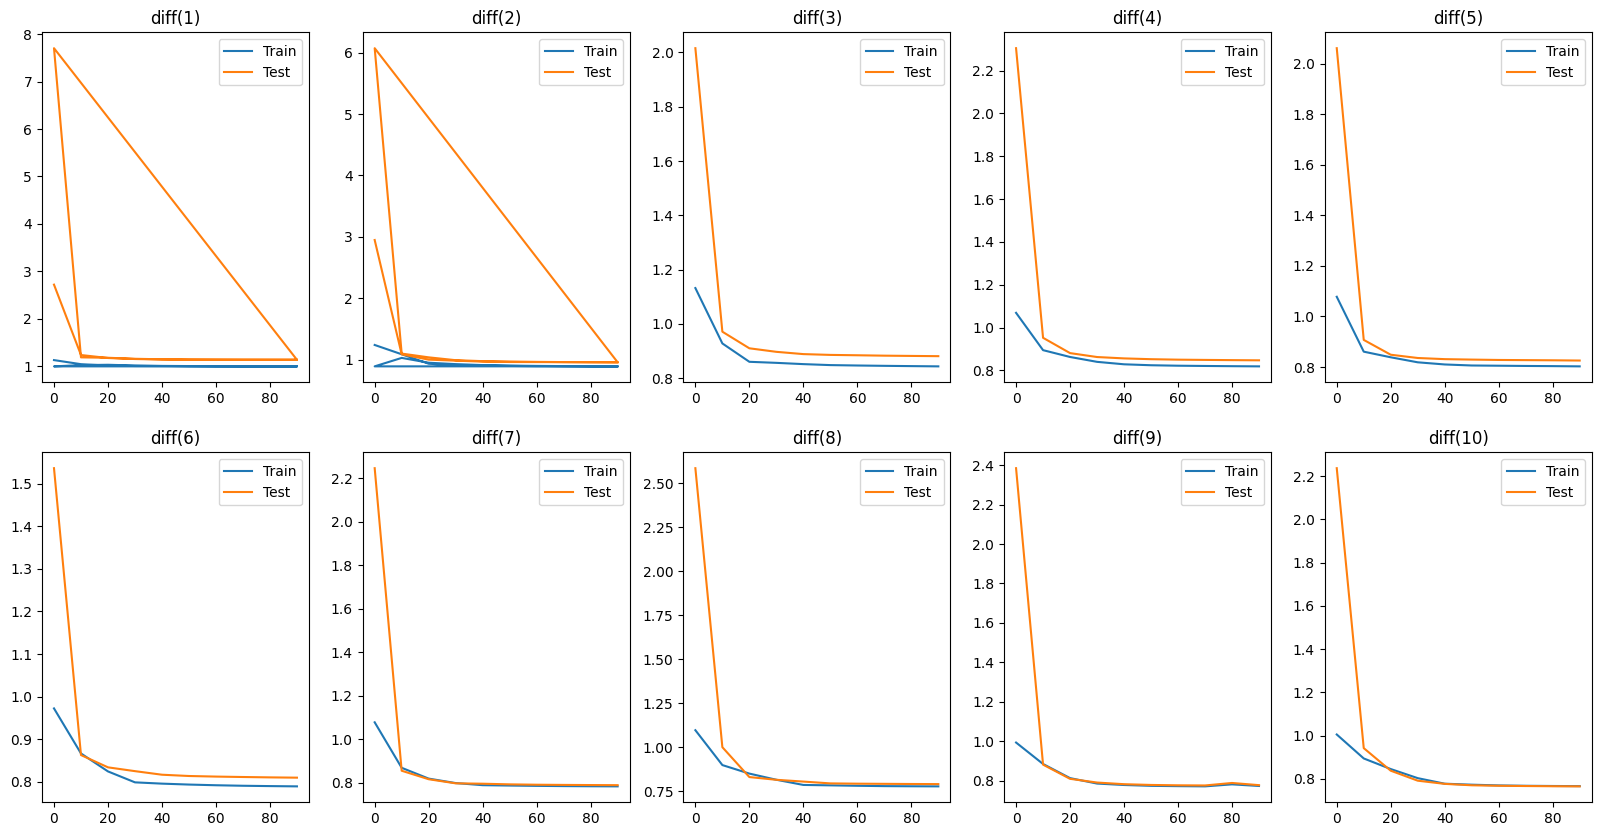

In [82]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for k in range(10) :
    axes[k//5][k%5].plot(ep_list[k], train_loss_list[k], label='Train')
    axes[k//5][k%5].plot(ep_list[k], test_loss_list[k], label='Test')
    axes[k//5][k%5].legend()
    axes[k//5][k%5].set_title(f'diff({k+1})')

plt.show()

### e. Evaluation of our NN

In [83]:
from sklearn.metrics import r2_score

h_list = [k for k in range(1, 11)]
score_train = {}
Y_train_pred_list = {}

for k in range(10):
    Y_train_pred = Y_scaler_s[k].inverse_transform(model_list[k](X_train_norm).detach().numpy())

    Y_train_pred_list[k] = pd.Series(Y_train_pred.flatten())

    score_train[k] = r2_score(Y_train[:, k], Y_train_pred)

reg_lin_scores = pd.DataFrame.from_dict(scores, orient='index', columns=['R2'])
nn_score_train = pd.DataFrame.from_dict(score_train, orient='index', columns=['R2'])

In [84]:
Y_pred_df = pd.DataFrame()
for k in range(10):
    Y_pred_df[f'diff({k+1})'] = Y_train_pred_list[k]

Y_true_df = pd.DataFrame()
for k in range(10):
    Y_true_df[f'diff({k+1})'] = Y_train[:, k]

Imbalance_df = pd.DataFrame()
Imbalance_df['Imbalance'] = X_train[:, 0].detach().numpy()

df_total_true = pd.concat([Imbalance_df, Y_true_df], axis=1)
df_total_pred = pd.concat([Imbalance_df, Y_pred_df], axis=1)

df_total_true_groupby = df_total_true.groupby('Imbalance').mean()
df_total_pred_groupby = df_total_pred.groupby('Imbalance').mean()

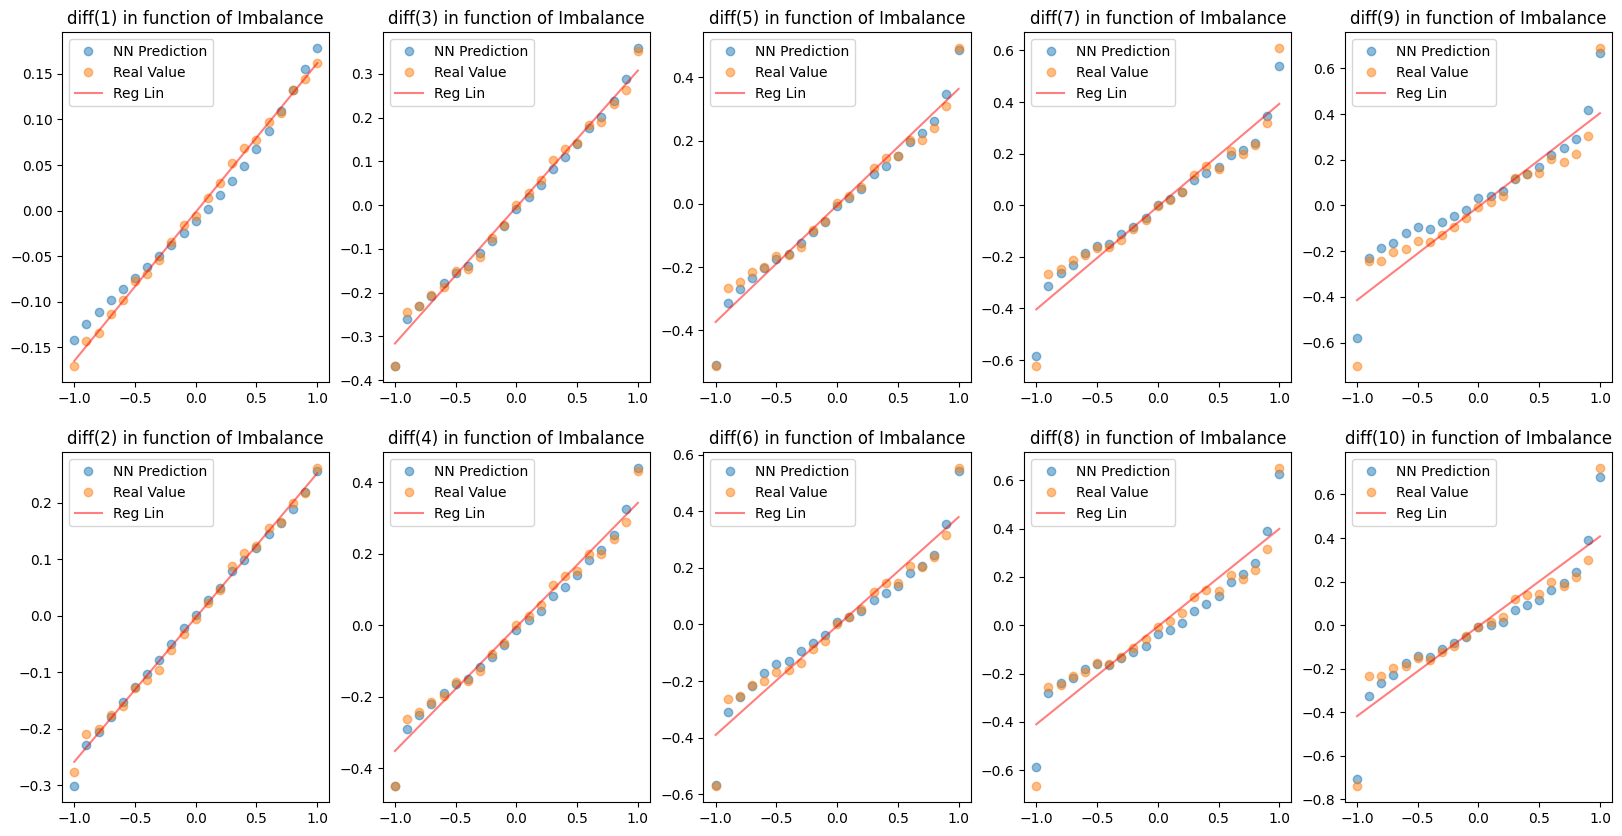

In [85]:
scores_NN = {}
scores_reglin = {}

fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for k in range(10) :
    
  #NN
  axes[k%2,k//2].plot(df_total_pred_groupby.index, df_total_pred_groupby[f'diff({k+1})'], label='NN Prediction', marker='o', linestyle='None', alpha=0.5)
  axes[k%2,k//2].legend()
  axes[k%2,k//2].set_title(f'NN prediction : diff({k+1}) in function of Imbalance')

  scores_NN[f'diff({k+1})'] = r2_score(df_total_true_groupby[f'diff({k+1})'], df_total_pred_groupby[f'diff({k+1})'])

  #Reg lin
  axes[k%2,k//2].plot(df_total_true_groupby.index, df_total_true_groupby[f'diff({k+1})'], label='Real Value', marker='o', linestyle='None', alpha=0.5)
  
  x_ref = df_total_true_groupby.index.to_numpy()
  y_ref = df_total_true_groupby[f'diff({k+1})']
  x_ref = x_ref.reshape(-1, 1)
  linear_regression = LinearRegression(fit_intercept=True).fit(x_ref, y_ref)
  y_predict = linear_regression.predict(x)
  axes[k%2,k//2].plot(np.array(x_ref), y_predict, color='red', label='Reg Lin', alpha=0.5)
  axes[k%2,k//2].legend()
  axes[k%2,k//2].set_title(f'diff({k+1}) in function of Imbalance')

  scores_reglin[f'diff({k+1})'] = linear_regression.score(x_ref,y_ref)
plt.show()


Visually we observe that the Neural Network performs better when $h$ increases than the linear Regression. 

In [86]:
df_scores = pd.DataFrame(list(scores_reglin.items()), columns=['h', 'score_r2_reg_lin'])
df_scores['score_r2_NN'] = list(scores_NN.values())
df_scores

,h,score_r2_reg_lin,score_r2_NN
0,diff(1),0.998789,0.980895
1,diff(2),0.995908,0.995618
2,diff(3),0.987258,0.996601
3,diff(4),0.970156,0.994107
4,diff(5),0.950205,0.994023
5,diff(6),0.925300,0.990182
6,diff(7),0.898700,0.991078
7,diff(8),0.872727,0.980783
8,diff(9),0.847362,0.957678
9,diff(10),0.822703,0.981553


### f. Evaluation on the Test Set : 

In [87]:
h_list = [k for k in range(1, 11)]
score_test = {}
Y_test_pred_list = {}

for k in range(10):
    Y_test_pred = Y_scaler_s[k].inverse_transform(model_list[k](X_test_norm).detach().numpy())

    Y_test_pred_list[k] = pd.Series(Y_test_pred.flatten())

    score_test[k] = r2_score(Y_test[:, k], Y_test_pred)

reg_lin_scores = pd.DataFrame.from_dict(scores, orient='index', columns=['R2'])
nn_scores_test = pd.DataFrame.from_dict(score_test, orient='index', columns=['R2'])

In [88]:
Y_pred_df = pd.DataFrame()
for k in range(10):
    Y_pred_df[f'diff({k+1})'] = Y_test_pred_list[k]

Y_true_df = pd.DataFrame()
for k in range(10):
    Y_true_df[f'diff({k+1})'] = Y_test[:, k]

Imbalance_df = pd.DataFrame()
Imbalance_df['Imbalance'] = X_test[:, 0].detach().numpy()

df_total_true = pd.concat([Imbalance_df, Y_true_df], axis=1)
df_total_pred = pd.concat([Imbalance_df, Y_pred_df], axis=1)

df_total_true_groupby = df_total_true.groupby('Imbalance').mean()
df_total_pred_groupby = df_total_pred.groupby('Imbalance').mean()

### g. Analysis of results

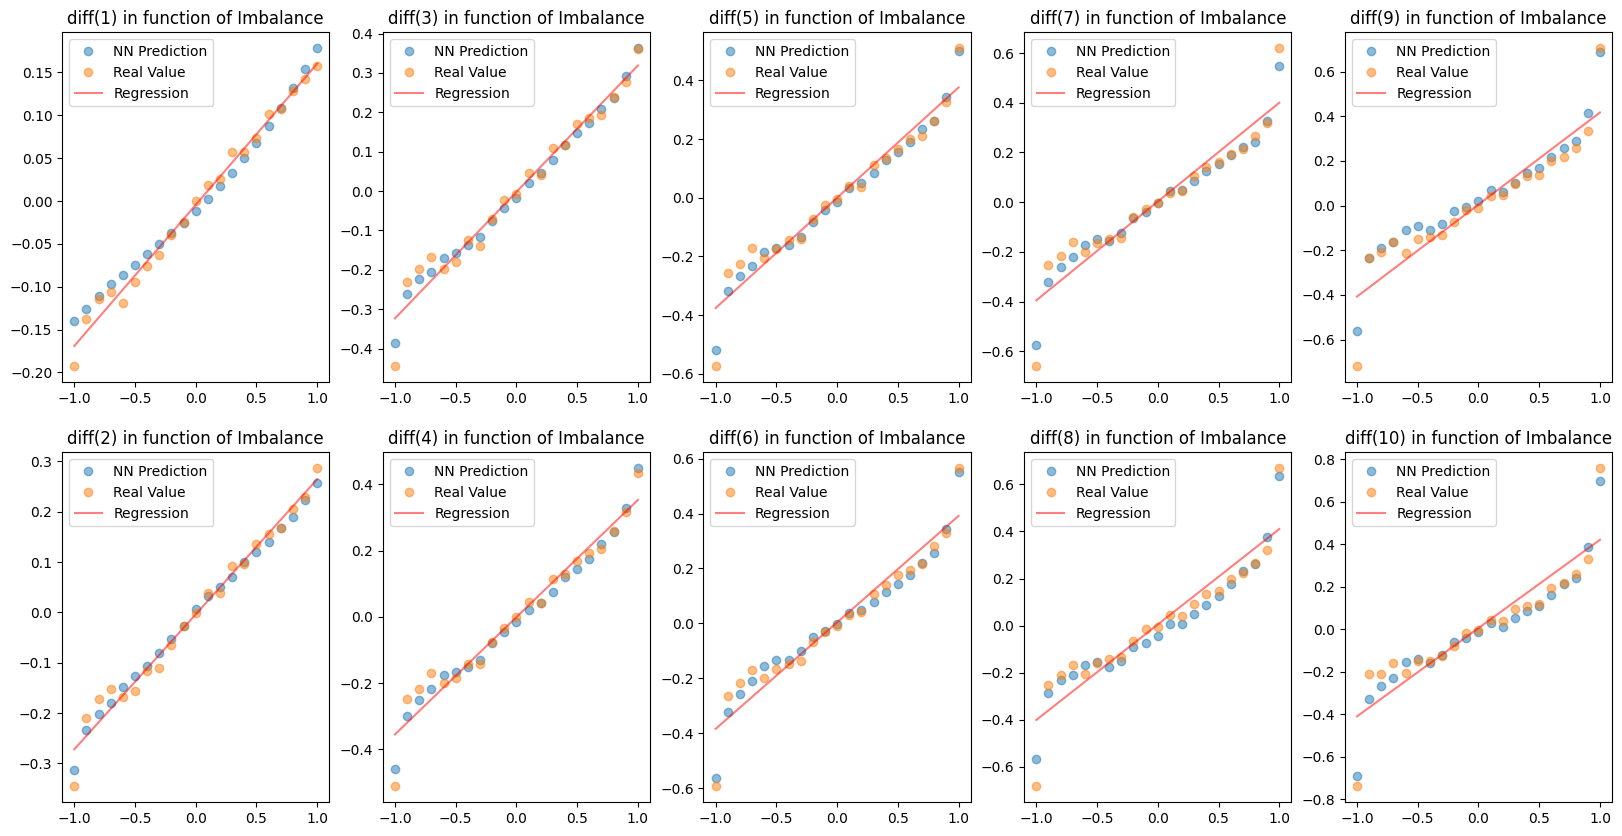

In [89]:
scores_NN = {}
scores_reglin = {}

fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for k in range(10) :
    
  #NN
  axes[k%2,k//2].plot(df_total_pred_groupby.index, df_total_pred_groupby[f'diff({k+1})'], label='NN Prediction', marker='o', linestyle='None', alpha=0.5)
  axes[k%2,k//2].legend()
  axes[k%2,k//2].set_title(f'NN prediction : diff({k+1}) in function of Imbalance')

  scores_NN[f'diff({k+1})'] = r2_score(df_total_true_groupby[f'diff({k+1})'], df_total_pred_groupby[f'diff({k+1})'])

  #Reg lin
  axes[k%2,k//2].plot(df_total_true_groupby.index, df_total_true_groupby[f'diff({k+1})'], label='Real Value', marker='o', linestyle='None', alpha=0.5)
  
  x_ref = df_total_true_groupby.index.to_numpy()
  y_ref = df_total_true_groupby[f'diff({k+1})']
  x_ref = x_ref.reshape(-1, 1)
  linear_regression = LinearRegression(fit_intercept=True).fit(x_ref, y_ref)
  y_predict = linear_regression.predict(x)  
  axes[k%2,k//2].plot(np.array(x_ref), y_predict, color='red', label='Regression', alpha=0.5)
  axes[k%2,k//2].legend()
  axes[k%2,k//2].set_title(f'diff({k+1}) in function of Imbalance')

  scores_reglin[f'diff({k+1})'] = linear_regression.score(x_ref,y_ref)
plt.show()

We observe the same results than for the traning dataset, that is to say, the Neural Network seems to be better at fitting the curve, especially for large h 

In [90]:
df_scores = pd.DataFrame(list(scores_reglin.items()), columns=['h', 'score_r2_reg_lin'])
df_scores['score_r2_NN'] = list(scores_NN.values())
df_scores

,h,score_r2_reg_lin,score_r2_NN
0,diff(1),0.989358,0.968214
1,diff(2),0.977332,0.985945
2,diff(3),0.961336,0.985667
3,diff(4),0.948570,0.985962
4,diff(5),0.925861,0.986433
5,diff(6),0.913126,0.986636
6,diff(7),0.877027,0.981202
7,diff(8),0.858836,0.974441
8,diff(9),0.835929,0.962179
9,diff(10),0.807567,0.975949


Based on the above results, we can deduce that that NN is generally better to predict movement prices based on the imbalance. We can, however observe that for $h=1$ the liear regression seems a bit better.

To improve the result, we can find a better architecture for the NN and also find better parameter for this Neural Network with a fine-tuning. We can also add features from the orderbook or create new features based on existing features. 